                                This Notebook is inspired from sentdex youtube lecture

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt

In [2]:
x = torch.tensor([5,3])
y = torch.tensor([10,4])

print(x*y)

tensor([50, 12])


In [3]:
y = torch.rand([2,5])
print(y)

tensor([[0.9446, 0.6935, 0.4687, 0.6600, 0.7754],
        [0.7060, 0.1116, 0.8732, 0.4796, 0.5344]])


In [4]:
y = y.view([1,10])
print(y)

tensor([[0.9446, 0.6935, 0.4687, 0.6600, 0.7754, 0.7060, 0.1116, 0.8732, 0.4796,
         0.5344]])


### Downloading MNIST dataset

In [5]:
train = datasets.MNIST("", train=True, download=True, transform= transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True, transform= transforms.Compose([transforms.ToTensor()]))

C:\Users\91888\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [7]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [8]:
x, y = data[0][0], data[1][0] 
print(y)
print(x.shape)

tensor(7)
torch.Size([1, 28, 28])


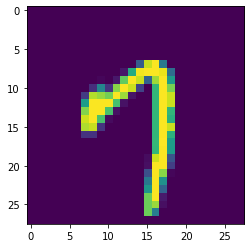

In [9]:
plt.imshow(x.view(28,28)) #we have to reshape x because greyscale image tensor coverted shape has  2 dimensions 28x28
plt.show()

### To confirm our dataset is balanced or not

In [10]:
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
total = 0
for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total +=1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [11]:
for i in counter_dict:
    print(str(i)+' : '+str(round(counter_dict[i]/total*100,2)))

0 : 9.87
1 : 11.24
2 : 9.93
3 : 10.22
4 : 9.74
5 : 9.04
6 : 9.86
7 : 10.44
8 : 9.75
9 : 9.92


## Building our Neural Network

In [12]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64) #28*28 == image dimensions, 64 == no of neurons in a layer 1 
        self.fc2 = nn.Linear(64, 64) #64 == output of layer 1, 64 == no of neurons in a layer 2 
        self.fc3 = nn.Linear(64, 64) #64 == output of layer 2, 64 == no of neurons in a layer 3
        self.fc4 = nn.Linear(64, 10) #64 == output of layer 3, 10 == output layer
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


Example of super().__init__() is given in link below:

https://pythonprogramming.net/building-deep-learning-neural-network-pytorch/

nn.Module doc example:

https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module

In [13]:
X = torch.rand((28,28))
X = X.view(-1,28*28)

-1 basically means we are saying input is of any size, be prepared for any amount of data pass through

In [14]:
output = net(X)
output

tensor([[-2.2577, -2.1796, -2.2453, -2.4182, -2.3015, -2.3178, -2.3812, -2.4041,
         -2.3274, -2.2220]], grad_fn=<LogSoftmaxBackward>)

In [15]:
optimizer = optim.Adam(net.parameters(), lr = 0.001)
EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)
    

tensor(0.2248, grad_fn=<NllLossBackward>)
tensor(0.0504, grad_fn=<NllLossBackward>)
tensor(0.0114, grad_fn=<NllLossBackward>)


In [16]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print('Accuracy : ', round(correct/total*100,2))

Accuracy :  96.82


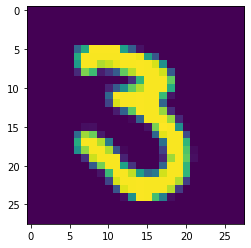

Prediction Value :  tensor(3)


In [17]:
dta = 9

plt.imshow(X[dta].view(28,28))
plt.show()

print('Prediction Value : ',torch.argmax(net(X[dta].view(-1,28*28))[0]))

## Convonutional Networks

In [18]:
import os
import cv2
import numpy as np
from tqdm import tqdm

In [19]:
REBUILD_DATA = False
data_path = 'PetImages/Training_data'

Dataset can be downloaded from here: 
    
https://www.microsoft.com/en-us/download/details.aspx?id=54765

In [20]:
class DogsVSCats():
    IMG_SIZE = 50
    CATS = "PetImages/Cat"
    DOGS = "PetImages/Dog"
    TESTING = "PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        np.save(data_path+"training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

In [21]:
training_data = np.load(data_path+'/training_data.npy', allow_pickle=True)

In [22]:
len(training_data)

24946

In [28]:
training_data[10][0]

50

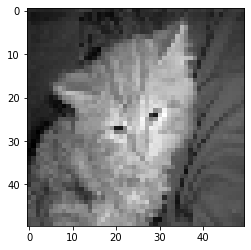

In [24]:
plt.imshow(training_data[10][0], cmap='gray')
plt.show()

In [31]:
class Net(nn.Module):
    def __init__(self):
        super().__init__() # just run the init of parent class (nn.Module)
        self.conv1 = nn.Conv2d(1, 32, 5) # input is 1 image, 32 output channels, 5x5 kernel / window
        self.conv2 = nn.Conv2d(32, 64, 5) # input is 32, bc the first layer output 32. Then we say the output will be 64 channels, 5x5 kernel / window
        self.conv3 = nn.Conv2d(64, 128, 5)

        x = torch.randn(50,50).view(-1,1,50,50)
        self._to_linear = None
        self.convs(x)

        self.fc1 = nn.Linear(self._to_linear, 512) #flattening.
        self.fc2 = nn.Linear(512, 2) # 512 in, 2 out bc we're doing 2 classes (dog vs cat).

    def convs(self, x):
        # max pooling over 2x2
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv3(x)), (2, 2))

        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
        return x
    
    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)  # .view is reshape ... this flattens X before 
        x = F.relu(self.fc1(x))
        x = self.fc2(x) # bc this is our output layer. No activation here.
        return F.softmax(x, dim=1)

net = Net()